In [1]:
#This notebook was created by Prisha Jain

In [2]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#opening .fits file, change the path to the path of the file of the file you wish to open.
# level 1a data
data1 = fits.open(r"C:\Users\prish\Downloads\emm_emr_l1a_20210220t112122_0008_r_v01-04.fits")
hdr_info = data1[0].header
print(repr(hdr_info))

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 


In [4]:
#displaying table of data
data_a=Table(data1[1].data)
data_a

cmd_fc_echo,cmd_seq_id_echo,cmd_acc_cnt,time_upd_cmd_acc_cnt,sc_stat_cmd_acc_cnt,cmd_rej_cnt,one_pps_counter,fpga_code_ver,pointing_mirror_pos,acq_id,acq_cmd_dwell_stat,acq_cmd_step_stat,acq_cmd_pause_stat,acq_cmd_row_stat,acq_cmd_sample_counter,img_boot_select,img_check_checksum,image_store_checksum,image_expected_checksum,stepper_motor_offset,sub_com_param_1,sub_com_param_2,sub_com_param_3,sub_com_param_4,sub_com_param_5,sub_com_param_6,sub_com_param_7,sub_com_param_8,fringe_count,fringe_offset,edac_diag_stat,sw_cmd_acc_count,sw_cmd_rej_count,sw_cmd_rej_echo,gain_cal_res,offset_cal_res,pps_timer_mode,sw_stat_flash_pwr_on,sun_event_ctr,acq_cmd_stat_executing,acq_cmd_stat_go_home_enabled,acq_cmd_stat_ccw_dir,fpga_temp_k,converter_temp_k,ccsds_id,sci_packet_seq_count,sci_packet_length,det_num,sci_data_size,utc,range_to_ctr,range_to_surf,ang_targ_size,sc_pos [3],quaternion [4],l_sub_s,bore_flag,latitude,longitude,right_ascension,declination,incidence,emission,phase,local_true_solar_time,ang_fov_size,ang_targ_and_fov,npts2d,x2d [30],y2d [30],npts3d,x3d [30],y3d [30],z3d [30],sun_vector [3],bore_intcpt [3],on_off,optical_det_num,bb_temp1,bb_temp2,bb_temp3,bb_temp4,beamsplitter_temp,detector_temp1,detector_temp2,motor_driver_board_temp,stepper_motor_temp,spare_temp,gain,gravity_comp_status,led1,led2,coarse_led1,coarse_led2,fine_led1,fine_led2,motor_temp,nsamples,os_pos,p12v,m12v,p5v,m5v,p3_3v,p2_5v,p5vd,p1v,parm_sub_addr,peak_fringe,primary_temp1,raw_ifgm [2500],sample_dir,sclk,sclk_sub,sample_timing_mode,servo_pwr_on,sun_vect_prot_enabled,sc_wd_enabled,proc_wd_enabled,instr_safed,pwr_cycle_requested,pwr_off_request,cant_find_home,sc_safed,sun_fault_event,searching_for_home,pnt_mirror_at_home,scan_period,compression_status,sci_pad_bytes,gain_convert,cal_flag_status,laser
int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,float64,int32,int32,int32,int32,float64,float64,int32,int32,int32,int32,int32,int32,float64,float64,int32,int32,int32,uint8,int32,str24,float64,float64,float64,float64,float64,float64,uint8,float32,float32,float64,float64,float32,float32,float32,float64,float64,float64,int32,float64,float64,int32,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,int32,int32,int32,int32,float64,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,int32,float64,float64,float64,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32,uint8,int32,int32,float64,int32,int32
1,20,20,127,254,0,127,549,0,1,1,0,0,0,1,0,-2147483648,-2147483648,165888,2,150,1,0,0,13154,0,19680182,0,1122,-0.133209228515625,0,26,0,0,2326.35498046875,100.1739501953125,2,0,0,1,0,0,305.7138977050781,302.94171142578125,11199850,5,1317,5,1264,2021-02-20 11:21:22.893,40047.04296875,36651.2578125,9.694741249084473,10835.8115234375 .. -5659.86328125,0.48749300837516785 .. 0.43014898896217346,6.434427738189697,0,0.0,0.0,174.4028778076172,21.6934814453125,0.0,0.0,0.0,0.0,0.3093971908092499,174.395263671875,21,76.86358642578125 .. 0.0,-8.525327682495117 .. 0.0,21,76.86358642578125 .. 0.0,-8.525327682495117 .. 0.0,80003.5703125 .. 0.0,-234327379.103706 .. 11227178.786037,76.94171142578125 .. 79998.3046875,0,5,286.1135559082031,285.9161071777344,285.87384033203125,285.95208740234375,287.9393310546875,289.2604675292969,289.3463134765625,293.6248474121094,285.2259216308594,285.0222473144531,1,0,1,0,1,0,1,0,288.1322326660156,1122,10214,12.008514404296875,-11.970977783203125,4.881970405578613,-4.94711446762085,3.2742919921875,2.4510498046875,4.947723388671875,0.9816741943359375,9,1.7821502685546875,287.3042297363281,-0.0008392333984375 .. 0.0,0,666656302,25348,0,1,1,1,1,0,0,0,0,0,0,0,1,2,1,2,1.0,0,1
1,20,20,129,2,0,129,549,0,1,2,0,0,0,2,0,-2147483648,-2147483648,165888,2,30000,10,220,19809487,

In [5]:
det_temp = data_a['detector_temp2']
mirror_temp= data_a['detector_temp1']
sc_clock= data_a['sclk']
time=data_a['local_true_solar_time']

In [6]:
# making different plots with various parameters

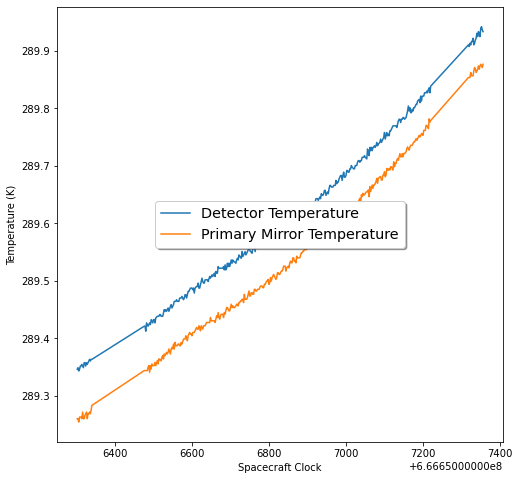

In [7]:
plt.figure(figsize=(8,8))
plt.plot(sc_clock,det_temp, label='Detector Temperature')
plt.plot(sc_clock,mirror_temp, label='Primary Mirror Temperature')
plt.ylabel('Temperature (K)')
plt.xlabel('Spacecraft Clock')
plt.legend(loc='center', shadow=True, fontsize='x-large')

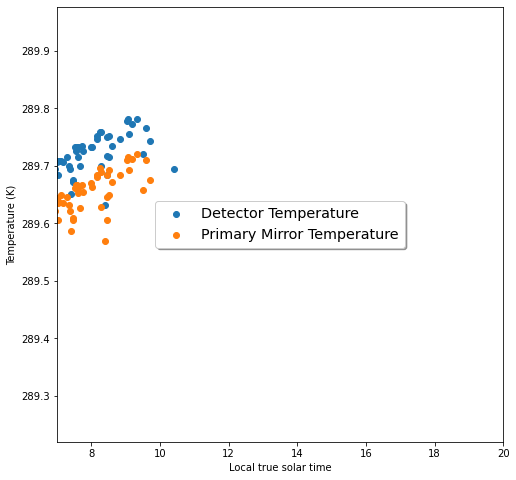

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(time,det_temp, label='Detector Temperature')
plt.scatter(time,mirror_temp, label='Primary Mirror Temperature')
plt.ylabel('Temperature (K)')
plt.xlabel('Local true solar time')
plt.xlim(7,20)
plt.legend(loc='center', shadow=True, fontsize='x-large')

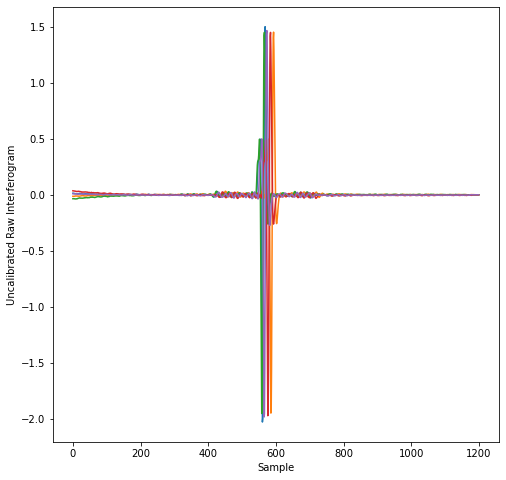

In [9]:
spectrum=data_a['raw_ifgm']
plt.figure(figsize=(8,8))
for x in range(249,259,2):
    spec=spectrum[x,:1200]
    plt.plot(spec)
    plt.ylabel('Uncalibrated Raw Interferogram')
    plt.xlabel('Sample')

In [10]:
# level 1b data
data2 = fits.open(r"C:\Users\prish\Downloads\emm_emr_l1b_20210220t112122_0008_r_v01-04.fits")
data_b=Table(data2[1].data)
data_b

sclk,sclk_sub,det_num,vspec [700],zpd,nsamples,target_type_num,xaxis [700],utc,ltime,incidence,emission,phase,sc_pos [3],bore_flag,target_range,sc_altitude,nfov,scan_period,ra,dec,latitude,longitude,x2d [30],y2d [30],npts2d
int32,int32,uint8,float64,float64,int32,uint8,float64,str24,float32,float32,float32,float32,float64,uint8,float64,float64,float32,uint8,float64,float64,float32,float32,float64,float64,int32
666656302,25348,5,-0.08577176183462143 .. -0.08577176183462143,563.0,1122,2,10.55090045928955 .. 10.55090045928955,2021-02-20 11:21:22.893,0.0,0.0,0.0,0.0,10835.8115234375 .. -5659.86328125,0,40047.04296875,36651.2578125,547.9943,2,174.4028778076172,21.6934814453125,0.0,0.0,76.86358642578125 .. 0.0,-8.525327682495117 .. 0.0,21
666656304,25374,5,-0.22720414400100708 .. -0.22720414400100708,561.0,1102,2,10.55090045928955 .. 10.55090045928955,2021-02-20 11:21:24.894,0.0,0.0,0.0,0.0,10840.1220703125 .. -5659.44921875,0,40046.109375,36650.3203125,547.79486,2,174.4673309326172,21.672073364257812,0.0,0.0,76.88825225830078 .. 0.0,-8.524361610412598 .. 0.0,21
666656306,25403,5,-0.04579625651240349 .. -0.04579625651240349,562.0,1121,2,10.55090045928955 .. 10.55090045928955,2021-02-20 11:21:26.894,0.0,0.0,0.0,0.0,10844.4326171875 .. -5659.03466796875,0,40045.171875,36649.3828125,547.6569,2,174.51296997070312,21.658348083496094,0.0,0.0,76.90328216552734 .. 0.0,-8.522933006286621 .. 0.0,21
666656308,25426,5,-0.1798822283744812 .. -0.1798822283744812,561.0,1102,2,10.55090045928955 .. 10.55090045928955,2021-02-20 11:21:28.894,0.0,0.0,0.0,0.0,10848.7421875 .. -5658.6201171875,0,40044.234375,36648.44921875,547.5189,2,174.55860900878906,21.644611358642578,0.0,0.0,76.91830444335938 .. 0.0,-8.521503448486328 .. 0.0,21
666656310,25452,5,-0.09844516217708588 .. -0.09844516217708588,562.0,1121,2,10.55090045928955 .. 10.55090045928955,2021-02-20 11:21:30.895,0.0,0.0,0.0,0.0,10853.05078125 .. -5658.20556640625,0,40043.296875,36647.51171875,547.4108,2,174.59365844726562,21.632205963134766,0.0,0.0,76.9284439086914 .. 0.0,-8.521219253540039 .. 0.0,21
666656312,25480,5,-0.11722861975431442 .. -0.11722861975431442,561.0,1102,2,10.55090045928955 .. 10.55090045928955,2021-02-20 11:21:32.895,0.0,0.0,0.0,0.0,10857.3603515625 .. -5657.791015625,0,40042.359375,36646.57421875,547.3355,2,174.61712646484375,21.621273040771484,0.0,0.0,76.9332504272461 .. 0.0,-8.522186279296875 .. 0.0,21
666656314,25504,5,-0.05170369893312454 .. -0.05170369893312454,562.0,1121,2,10.55090045928955 .. 10.55090045928955,2021-02-20 11:21:34.896,0.0,0.0,0.0,0.0,10861.66796875 .. -5657.37646484375,0,40041.42578125,36645.63671875,547.26013,2,174.64060974121094,21.61033821105957,0.0,0.0,76.93804931640625 .. 0.0,-8.523151397705078 .. 0.0,21
666656316,25535,5,-0.30525919795036316 .. -0.30525919795036316,561.0,1102,2,10.55090045928955 .. 10.55090045928955,2021-02-20 11:21:36.896,0.0,0.0,0.0,0.0,10865.9765625 .. -5656.9619140625,0,40040.48828125,36644.69921875,547.2072,2,174.65818786621094,21.603792190551758,0.0,0.0,76.93946838378906 .. 0.0,-8.523050308227539 .. 0.0,21
666656318,25557,5,-0.131964772939682 .. -0.131964772939682,562.0,1121,2,10.55090045928955 .. 10.55090045928955,2021-02-20 11:21:38.896,0.0,0.0,0.0,0.0,10870.2841796875 .. -5656.54736328125,0,40039.55078125,36643.76171875,547.1786,2,174.6693572998047,21.60203742980957,0.0,0.0,76.93720245361328 .. 0.0,-8.521783828735352 .. 0.0,21


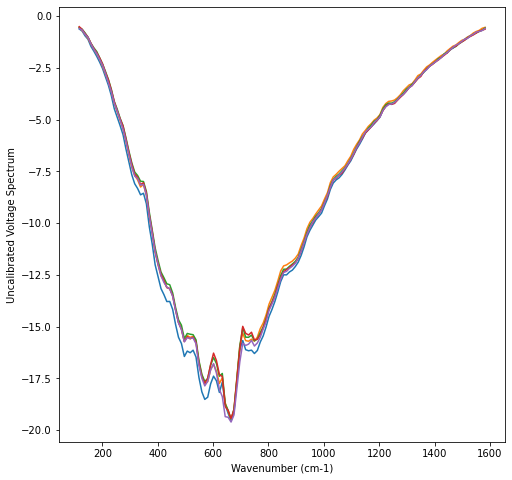

In [11]:
wavenumber=data_b['xaxis']
spectrum=data_b['vspec']
plt.figure(figsize=(8,8))
for x in range(249,259,2):
    wave=wavenumber[x,10:150]
    spec=spectrum[x,10:150]
    plt.plot(wave,spec)
    plt.ylabel('Uncalibrated Voltage Spectrum')
    plt.xlabel('Wavenumber (cm-1)')

In [12]:
# level 2 data
data3 = fits.open(r"C:\Users\prish\Downloads\emm_emr_l2_20210611t184645_0065_r_v01-06.fits")
data=Table(data3[1].data)
data

sclk,sclk_sub,det_num,calibrated_radiance [700],brightness_temp [700],quality,target_type_num,max_brightness_temp,nchan,utc,ltime,incidence,emission,phase,bore_flag,target_range,sc_altitude,nfov,scan_period,ra,dec,latitude,longitude,x2d [30],y2d [30],npts2d,l_sub_s,xaxis [700]
int32,int32,uint8,float64,float64,int32,uint8,float64,int32,str24,float32,float32,float32,float32,uint8,float64,float64,float32,uint8,float64,float64,float32,float32,float64,float64,int32,float64,float64
676273602,28298,5,-3.2097645430440025e-08 .. -3.2097645430440025e-08,0.0 .. 0.0,0,3,108.95010375976562,349,2021-06-11 18:50:43.751,0.0,0.0,0.0,0.0,0,23330.0546875,19933.9765625,2.5344603,2,160.42623901367188,27.61318588256836,0.0,0.0,164.46156311035156 .. 0.0,-18.354246139526367 .. 0.0,21,57.513362884521484,10.55090045928955 .. 10.55090045928955
676273604,28327,5,-6.667644925073546e-08 .. -6.667644925073546e-08,0.0 .. 0.0,0,3,110.41374206542969,349,2021-06-11 18:50:45.751,0.0,0.0,0.0,0.0,0,23330.015625,19933.9375,2.0125208,2,160.70660400390625,26.904294967651367,0.0,0.0,164.0566864013672 .. 0.0,-23.096643447875977 .. 0.0,21,57.513370513916016,10.55090045928955 .. 10.55090045928955
676273606,28351,5,2.2497642859775624e-08 .. 2.2497642859775624e-08,2.8140828609466553 .. 2.8140828609466553,0,3,111.0853271484375,349,2021-06-11 18:50:47.752,0.0,0.0,0.0,0.0,0,23329.9765625,19933.8984375,1.6866534,2,160.9834747314453,26.194860458374023,0.0,0.0,163.6089630126953 .. 0.0,-27.9822998046875 .. 0.0,21,57.51338195800781,10.55090045928955 .. 10.55090045928955
676273608,28375,5,-9.794950983632589e-08 .. -9.794950983632589e-08,0.0 .. 0.0,0,3,111.08787536621094,349,2021-06-11 18:50:49.752,0.0,0.0,0.0,0.0,0,23329.9375,19933.859375,1.5654703,2,161.2565460205078,25.484342575073242,0.0,0.0,163.11068725585938 .. 0.0,-32.94806671142578 .. 0.0,21,57.51339340209961,10.55090045928955 .. 10.55090045928955
676273610,28402,5,-6.809361963178162e-09 .. -6.809361963178162e-09,0.0 .. 0.0,0,3,110.43101501464844,349,2021-06-11 18:50:51.753,0.0,0.0,0.0,0.0,0,23329.8984375,19933.8203125,1.6500658,2,161.52638244628906,24.773319244384766,0.0,0.0,162.55296325683594 .. 0.0,-37.91785430908203 .. 0.0,21,57.51340103149414,10.55090045928955 .. 10.55090045928955
676273614,28457,5,-8.391823769215989e-08 .. -8.391823769215989e-08,0.0 .. 0.0,0,3,109.47112274169922,349,2021-06-11 18:50:55.753,0.0,0.0,0.0,0.0,0,23329.822265625,19933.7421875,2.4246695,2,162.05670166015625,23.3503475189209,0.0,0.0,161.210205078125 .. 0.0,-47.57776641845703 .. 0.0,21,57.51342010498047,10.55090045928955 .. 10.55090045928955
676273646,28865,5,-4.238695083813582e-08 .. -4.238695083813582e-08,0.0 .. 0.0,0,3,109.39517974853516,349,2021-06-11 18:51:27.76,0.0,0.0,0.0,0.0,0,23329.216796875,19933.134765625,2.514237,2,160.64987182617188,29.2252197265625,0.0,0.0,165.24957275390625 .. 0.0,-8.196320533752441 .. 0.0,21,57.51358413696289,10.55090045928955 .. 10.55090045928955
676273650,28916,5,-6.134993668638344e-08 .. -6.134993668638344e-08,0.0 .. 0.0,0,3,134.011962890625,349,2021-06-11 18:51:31.76,0.0,0.0,0.0,0.0,0,23329.142578125,19933.060546875,0.8445982,2,161.21107482910156,27.805662155151367,0.0,0.0,164.5286102294922 .. 0.0,-17.505456924438477 .. 0.0,21,57.51360321044922,10.55090045928955 .. 10.55090045928955
676273654,28973,5,-5.397238851401198e-07 .. -5.397238851401198e-07,0.0 .. 0.0,0,3,197.8376007080078,349,2021-06-11 18:51:35.761,18.012777,99.03126,81.52338,18.494188,1,23329.0703125,19932.986328125,-0.046448123,2,161.7585906982422,26.384078979492188,-25.166073,145.07895,139.48240661621094 .. 0.0,-23.816051483154297 .. 0.0,21,57.51362609863281,10.55090045928955 .. 10.55090045928955


Text(0, 0.5, 'Max Brightness Temperature (K)')

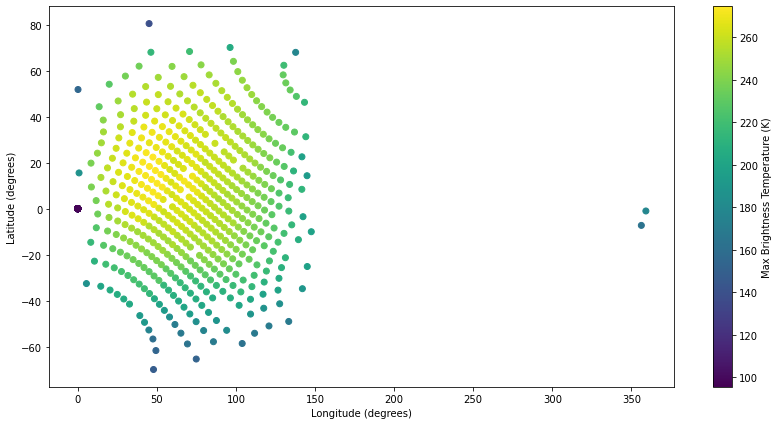

In [13]:
# plotting max brightness temperature in latitude vs longitude plot (without cleaning the data and removing the wrong data points)
lat=data['latitude']
lon=data['longitude'] % 360
bri=data['max_brightness_temp']
for i in range(bri.size):
    if(bri[i]==0):
        bri[i]=np.nan
cal=data['calibrated_radiance']
alt=data['sc_altitude']
lt=data['ltime']
plt.figure(figsize=(14,7))
plt.scatter(lon,lat,c=bri)
plt.ylabel('Latitude (degrees)')
plt.xlabel('Longitude (degrees)')
cbar=plt.colorbar()
cbar.ax.set_ylabel('Max Brightness Temperature (K)')

Text(0, 0.5, 'Max Brightness Temperature (K)')

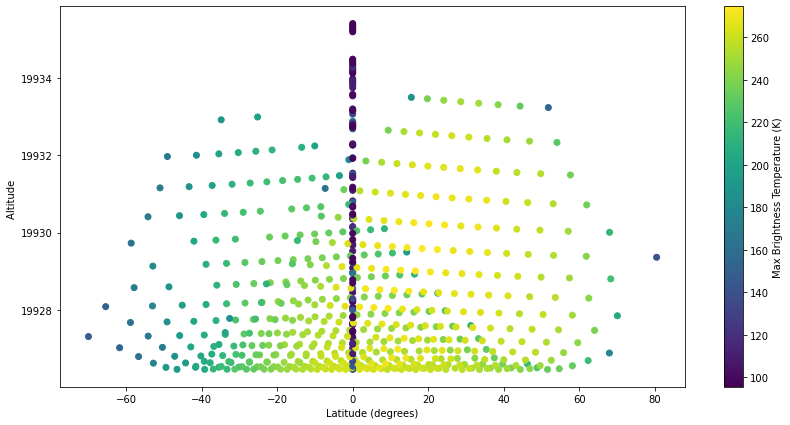

In [14]:
# plotting max brightness temperature in altitude vs latitude plot (without cleaning the data and removing the wrong data points)
plt.figure(figsize=(14,7))
plt.scatter(lat,alt,c=bri)
plt.ylabel('Altitude ')
plt.xlabel('Latitude (degrees)')
cbar=plt.colorbar()
cbar.ax.set_ylabel('Max Brightness Temperature (K)')

Text(0, 0.5, 'Max Brightness Temperature (K)')

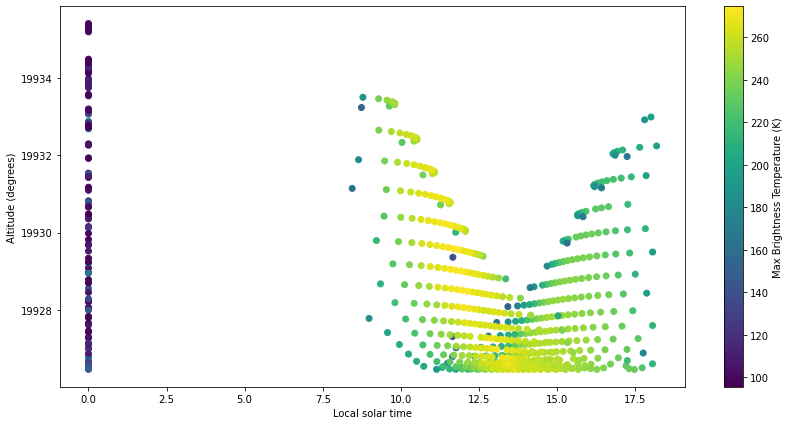

In [15]:
# plotting max brightness temperature in altitude vs local solar time plot (without cleaning the data and removing the wrong data points)
plt.figure(figsize=(14,7))
plt.scatter(lt,alt,c=bri)
plt.ylabel('Altitude (degrees)')
plt.xlabel('Local solar time')
cbar=plt.colorbar()
cbar.ax.set_ylabel('Max Brightness Temperature (K)')

Text(0, 0.5, 'Max Brightness Temperature (K)')

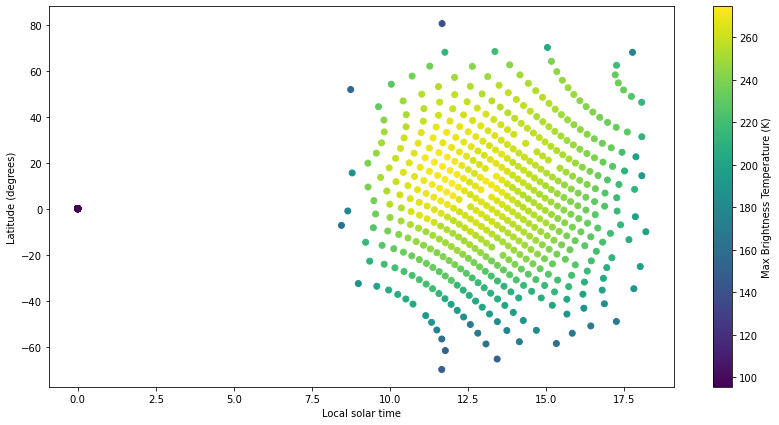

In [16]:
# plotting max brightness temperature in latitude vs local solar time plot (without cleaning the data and removing the wrong data points)
plt.figure(figsize=(14,7))
plt.scatter(lt,lat,c=bri)
plt.ylabel('Latitude (degrees)')
plt.xlabel('Local solar time')
cbar=plt.colorbar()
cbar.ax.set_ylabel('Max Brightness Temperature (K)')

In [17]:
# level2 data
data4 = fits.open(r"C:\Users\prish\Downloads\emm_emr_l2_20210611t184645_0065_r_v01-06.fits")
data=Table(data4[1].data)
data

sclk,sclk_sub,det_num,calibrated_radiance [700],brightness_temp [700],quality,target_type_num,max_brightness_temp,nchan,utc,ltime,incidence,emission,phase,bore_flag,target_range,sc_altitude,nfov,scan_period,ra,dec,latitude,longitude,x2d [30],y2d [30],npts2d,l_sub_s,xaxis [700]
int32,int32,uint8,float64,float64,int32,uint8,float64,int32,str24,float32,float32,float32,float32,uint8,float64,float64,float32,uint8,float64,float64,float32,float32,float64,float64,int32,float64,float64
676273602,28298,5,-3.2097645430440025e-08 .. -3.2097645430440025e-08,0.0 .. 0.0,0,3,108.95010375976562,349,2021-06-11 18:50:43.751,0.0,0.0,0.0,0.0,0,23330.0546875,19933.9765625,2.5344603,2,160.42623901367188,27.61318588256836,0.0,0.0,164.46156311035156 .. 0.0,-18.354246139526367 .. 0.0,21,57.513362884521484,10.55090045928955 .. 10.55090045928955
676273604,28327,5,-6.667644925073546e-08 .. -6.667644925073546e-08,0.0 .. 0.0,0,3,110.41374206542969,349,2021-06-11 18:50:45.751,0.0,0.0,0.0,0.0,0,23330.015625,19933.9375,2.0125208,2,160.70660400390625,26.904294967651367,0.0,0.0,164.0566864013672 .. 0.0,-23.096643447875977 .. 0.0,21,57.513370513916016,10.55090045928955 .. 10.55090045928955
676273606,28351,5,2.2497642859775624e-08 .. 2.2497642859775624e-08,2.8140828609466553 .. 2.8140828609466553,0,3,111.0853271484375,349,2021-06-11 18:50:47.752,0.0,0.0,0.0,0.0,0,23329.9765625,19933.8984375,1.6866534,2,160.9834747314453,26.194860458374023,0.0,0.0,163.6089630126953 .. 0.0,-27.9822998046875 .. 0.0,21,57.51338195800781,10.55090045928955 .. 10.55090045928955
676273608,28375,5,-9.794950983632589e-08 .. -9.794950983632589e-08,0.0 .. 0.0,0,3,111.08787536621094,349,2021-06-11 18:50:49.752,0.0,0.0,0.0,0.0,0,23329.9375,19933.859375,1.5654703,2,161.2565460205078,25.484342575073242,0.0,0.0,163.11068725585938 .. 0.0,-32.94806671142578 .. 0.0,21,57.51339340209961,10.55090045928955 .. 10.55090045928955
676273610,28402,5,-6.809361963178162e-09 .. -6.809361963178162e-09,0.0 .. 0.0,0,3,110.43101501464844,349,2021-06-11 18:50:51.753,0.0,0.0,0.0,0.0,0,23329.8984375,19933.8203125,1.6500658,2,161.52638244628906,24.773319244384766,0.0,0.0,162.55296325683594 .. 0.0,-37.91785430908203 .. 0.0,21,57.51340103149414,10.55090045928955 .. 10.55090045928955
676273614,28457,5,-8.391823769215989e-08 .. -8.391823769215989e-08,0.0 .. 0.0,0,3,109.47112274169922,349,2021-06-11 18:50:55.753,0.0,0.0,0.0,0.0,0,23329.822265625,19933.7421875,2.4246695,2,162.05670166015625,23.3503475189209,0.0,0.0,161.210205078125 .. 0.0,-47.57776641845703 .. 0.0,21,57.51342010498047,10.55090045928955 .. 10.55090045928955
676273646,28865,5,-4.238695083813582e-08 .. -4.238695083813582e-08,0.0 .. 0.0,0,3,109.39517974853516,349,2021-06-11 18:51:27.76,0.0,0.0,0.0,0.0,0,23329.216796875,19933.134765625,2.514237,2,160.64987182617188,29.2252197265625,0.0,0.0,165.24957275390625 .. 0.0,-8.196320533752441 .. 0.0,21,57.51358413696289,10.55090045928955 .. 10.55090045928955
676273650,28916,5,-6.134993668638344e-08 .. -6.134993668638344e-08,0.0 .. 0.0,0,3,134.011962890625,349,2021-06-11 18:51:31.76,0.0,0.0,0.0,0.0,0,23329.142578125,19933.060546875,0.8445982,2,161.21107482910156,27.805662155151367,0.0,0.0,164.5286102294922 .. 0.0,-17.505456924438477 .. 0.0,21,57.51360321044922,10.55090045928955 .. 10.55090045928955
676273654,28973,5,-5.397238851401198e-07 .. -5.397238851401198e-07,0.0 .. 0.0,0,3,197.8376007080078,349,2021-06-11 18:51:35.761,18.012777,99.03126,81.52338,18.494188,1,23329.0703125,19932.986328125,-0.046448123,2,161.7585906982422,26.384078979492188,-25.166073,145.07895,139.48240661621094 .. 0.0,-23.816051483154297 .. 0.0,21,57.51362609863281,10.55090045928955 .. 10.55090045928955


Text(0, 0.5, 'Max Brightness Temperature (K)')

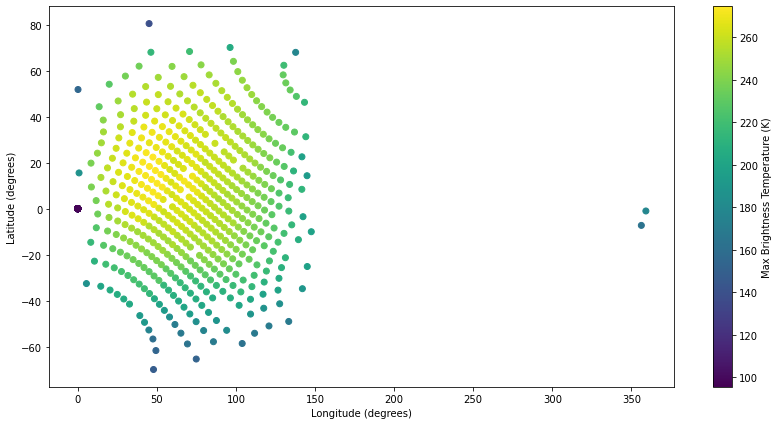

In [18]:
lat=data['latitude']
lon=data['longitude'] % 360
bri=data['max_brightness_temp']
br=data['brightness_temp']
for i in range(bri.size):
    if(bri[i]==0):
        bri[i]=np.nan
cal=data['calibrated_radiance']
alt=data['sc_altitude']
lt=data['ltime']
plt.figure(figsize=(14,7))
plt.scatter(lon,lat,c=bri)
plt.ylabel('Latitude (degrees)')
plt.xlabel('Longitude (degrees)')
cbar=plt.colorbar()
cbar.ax.set_ylabel('Max Brightness Temperature (K)')

Text(0, 0.5, 'Max Brightness Temperature (K)')

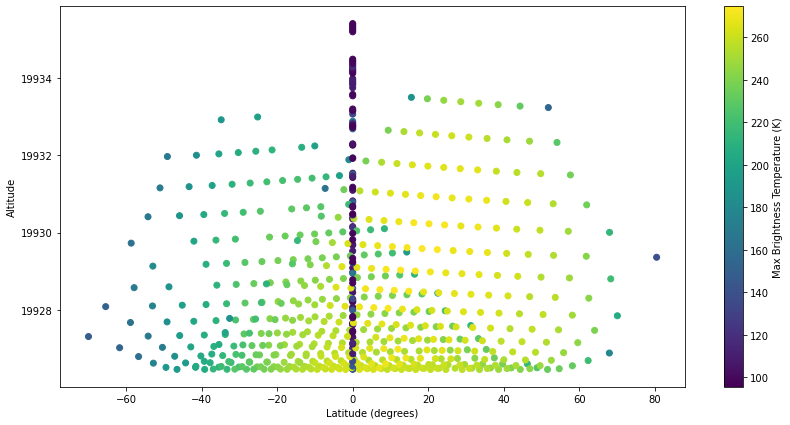

In [19]:
plt.figure(figsize=(14,7))
plt.scatter(lat,alt,c=bri)
plt.ylabel('Altitude')
plt.xlabel('Latitude (degrees)')
cbar=plt.colorbar()
cbar.ax.set_ylabel('Max Brightness Temperature (K)')

Text(0, 0.5, 'Max Brightness Temperature (K)')

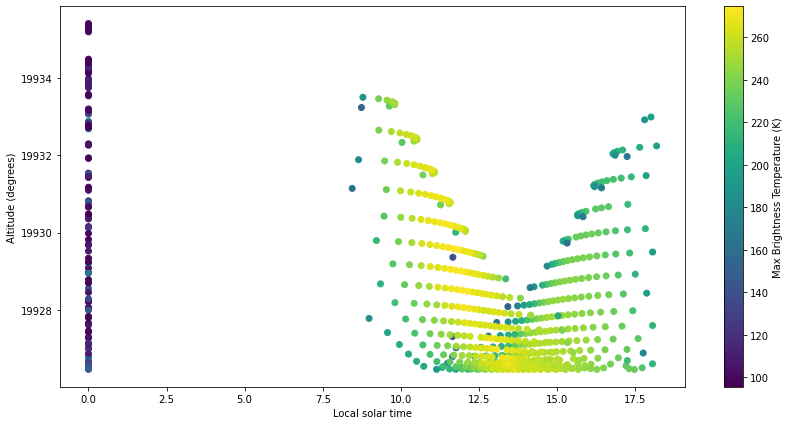

In [20]:
b=np.where(lt==0)
b
np.delete(lt,b)
np.delete(bri,b)
plt.figure(figsize=(14,7))
np.delete(bri, np.where(lt==0))
plt.scatter(lt,alt,c=bri)
plt.ylabel('Altitude (degrees)')
plt.xlabel('Local solar time')
cbar=plt.colorbar()
cbar.ax.set_ylabel('Max Brightness Temperature (K)')

Text(0, 0.5, 'Max Brightness Temperature (K)')

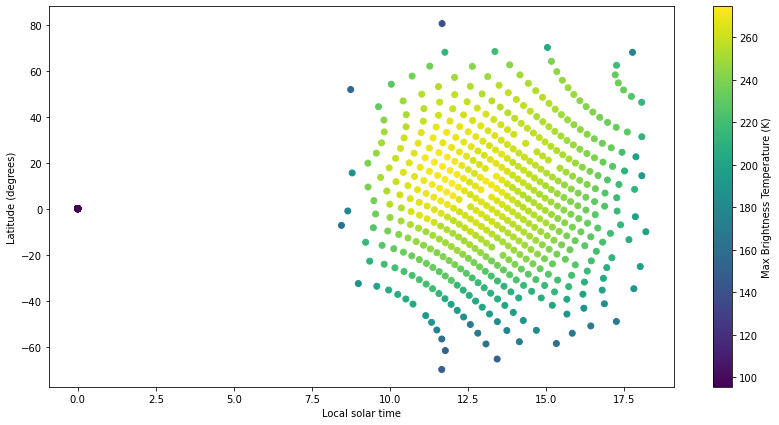

In [21]:
plt.figure(figsize=(14,7))
np.delete(bri, np.where(lt==0))
np.delete(bri, np.where(lat==0))
np.delete(lt, np.where(lt==0))
np.delete(lat, np.where(lat==0))
plt.scatter(lt,lat,c=bri)
plt.ylabel('Latitude (degrees)')
plt.xlabel('Local solar time')
cbar=plt.colorbar()
cbar.ax.set_ylabel('Max Brightness Temperature (K)')

Text(0.5, 0, 'Wavenumber (cm-1)')

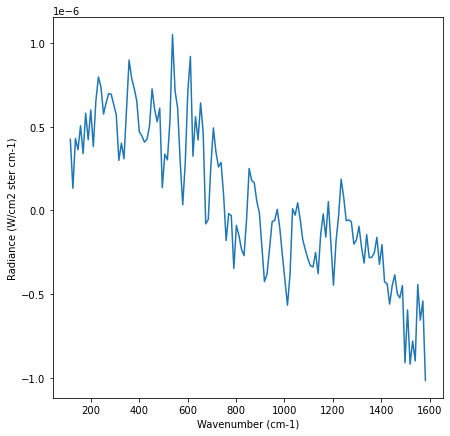

In [22]:
index=239
wavenumber=data['xaxis']
radiance=data['calibrated_radiance']
wave=wavenumber[index,10:150]
rad=radiance[index,10:150]
plt.figure(figsize=(7,7))
plt.plot(wave,rad)
plt.ylabel('Radiance (W/cm2 ster cm-1)')
plt.xlabel('Wavenumber (cm-1)')

C:\Users\prish\AppData\Local\Temp/ipykernel_15852/3559753899.py:1: RuntimeWarning: invalid value encountered in log
  brightness=(1.4387*wave)/np.log(1+(1.191e-12)*(wave**3)/rad)


Text(0.5, 0, 'Wavenumber (cm-1)')

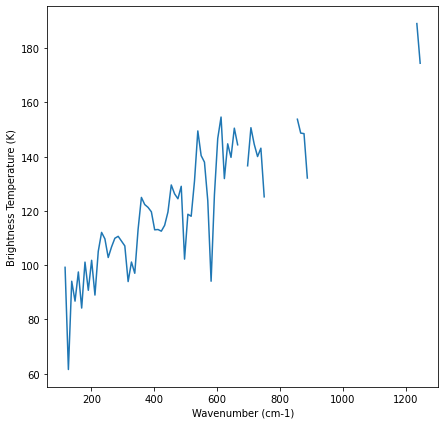

In [23]:
brightness=(1.4387*wave)/np.log(1+(1.191e-12)*(wave**3)/rad)
plt.figure(figsize=(7,7))
plt.plot(wave,brightness)
plt.ylabel('Brightness Temperature (K)')
plt.xlabel('Wavenumber (cm-1)')

In [24]:
data3 = fits.open(r"C:\Users\prish\Downloads\emm_emr_l2_20210613t064620_0066_r_v01-06.fits")
data=Table(data3[1].data)
data

sclk,sclk_sub,det_num,calibrated_radiance [700],brightness_temp [700],quality,target_type_num,max_brightness_temp,nchan,utc,ltime,incidence,emission,phase,bore_flag,target_range,sc_altitude,nfov,scan_period,ra,dec,latitude,longitude,x2d [30],y2d [30],npts2d,l_sub_s,xaxis [700]
int32,int32,uint8,float64,float64,int32,uint8,float64,int32,str24,float32,float32,float32,float32,uint8,float64,float64,float32,uint8,float64,float64,float32,float32,float64,float64,int32,float64,float64
676403127,23943,5,5.3174922243215406e-09 .. 6.954713471785112e-10,2.3089139461517334 .. 213.23193359375,0,3,110.40502166748047,700,2021-06-13 06:49:28.653,0.0,0.0,0.0,0.0,0,43005.6875,39610.1171875,2.440576,4,35.027198791503906,-26.9531307220459,0.0,0.0,43.30778121948242 .. 0.0,-49.5986442565918 .. 0.0,21,58.171287536621094,5.280099868774414 .. 5.280099868774414
676403131,23944,5,1.3941496845859547e-09 .. 1.1389339471534754e-09,1.6506552696228027 .. 217.52297973632812,0,3,110.66365814208984,700,2021-06-13 06:49:32.653,0.0,0.0,0.0,0.0,0,43004.8828125,39609.3125,1.6936119,4,34.87430191040039,-26.366670608520508,0.0,0.0,40.94261169433594 .. 0.0,-43.46851348876953 .. 0.0,21,58.17130661010742,5.280099868774414 .. 5.280099868774414
676403135,23943,5,-3.1024907087839892e-09 .. 1.014003547794573e-09,0.0 .. 216.48289489746094,0,3,111.90242767333984,700,2021-06-13 06:49:36.653,0.0,0.0,0.0,0.0,0,43004.078125,39608.5078125,1.167978,4,34.728248596191406,-25.77787971496582,0.0,0.0,38.85639190673828 .. 0.0,-36.742340087890625 .. 0.0,21,58.17132568359375,5.280099868774414 .. 5.280099868774414
676403139,23943,5,3.7676670672226464e-09 .. -5.469509289923735e-10,2.0941975116729736 .. 0.0,0,3,117.38848876953125,700,2021-06-13 06:49:40.653,0.0,0.0,0.0,0.0,0,43003.2734375,39607.69921875,0.8768951,4,34.585391998291016,-25.187715530395508,0.0,0.0,37.013633728027344 .. 0.0,-29.596553802490234 .. 0.0,21,58.171348571777344,5.280099868774414 .. 5.280099868774414
676403143,23944,5,8.460281719635532e-08 .. 1.0285809981525063e-09,7.846980571746826 .. 216.58633422851562,0,3,124.14137268066406,700,2021-06-13 06:49:44.653,0.0,0.0,0.0,0.0,0,43002.46484375,39606.89453125,0.82904303,4,34.44401550292969,-24.597347259521484,0.0,0.0,35.3802375793457 .. 0.0,-22.266311645507812 .. 0.0,21,58.17136764526367,5.280099868774414 .. 5.280099868774414
676403147,23943,5,4.740632775224185e-09 .. 1.3662317943641256e-09,2.2296762466430664 .. 219.10824584960938,0,3,115.85668182373047,700,2021-06-13 06:49:48.653,0.0,0.0,0.0,0.0,0,43001.66015625,39606.08984375,1.0198721,4,34.30215835571289,-24.00809097290039,0.0,0.0,33.9254035949707 .. 0.0,-15.00870132446289 .. 0.0,21,58.17138671875,5.280099868774414 .. 5.280099868774414
676403151,23943,5,1.0275834938511252e-07 .. 7.386010691945444e-10,8.900630950927734 .. 213.68212890625,0,3,112.47163391113281,700,2021-06-13 06:49:52.653,0.0,0.0,0.0,0.0,0,43000.85546875,39605.28125,1.4432114,4,34.160865783691406,-23.41959571838379,0.0,0.0,32.621273040771484 .. 0.0,-8.050323486328125 .. 0.0,21,58.171409606933594,5.280099868774414 .. 5.280099868774414
676403155,23943,5,-4.814388887552923e-10 .. 1.2025661577652613e-09,0.0 .. 217.9397430419922,0,3,112.71292877197266,700,2021-06-13 06:49:56.653,0.0,0.0,0.0,0.0,0,43000.046875,39604.4765625,2.083432,4,34.02055358886719,-22.830896377563477,0.0,0.0,31.444528579711914 .. 0.0,-1.5594942569732666 .. 0.0,21,58.17142868041992,5.280099868774414 .. 5.280099868774414
676403159,23943,5,-1.3980043789274532e-09 .. 6.483393821810068e-10,0.0 .. 212.54734802246094,0,3,111.0219955444336,700,2021-06-13 06:50:00.653,0.0,0.0,0.0,0.0,0,42999.2421875,39603.671875,2.919956,4,33.88135528564453,-22.24074935913086,0.0,0.0,30.376066207885742 .. 0.0,4.3656487464904785 .. 0.0,21,58.17144775390625,5.280099868774414 .. 5.280099868774414


In [25]:
latitude=data['latitude']
longitude=data['longitude'] % 360
brightness_max=data['max_brightness_temp']

Text(0, 0.5, 'Max Brightness Temperature (K)')

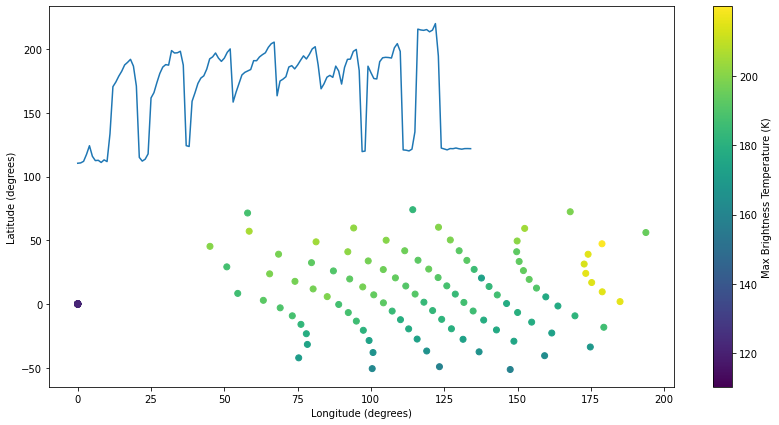

In [26]:
plt.figure(figsize=(14,7))
plt.scatter(longitude,latitude,c=brightness_max)
plt.plot(brightness_max)
plt.ylabel('Latitude (degrees)')
plt.xlabel('Longitude (degrees)')
cbar=plt.colorbar()
cbar.ax.set_ylabel('Max Brightness Temperature (K)')

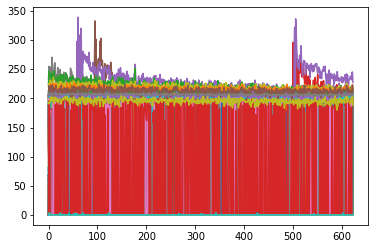

In [27]:
plt.plot(br)

C:\Users\prish\AppData\Local\Temp/ipykernel_15852/3559753899.py:1: RuntimeWarning: invalid value encountered in log
  brightness=(1.4387*wave)/np.log(1+(1.191e-12)*(wave**3)/rad)


Text(0.5, 0, 'Wavenumber (cm-1)')

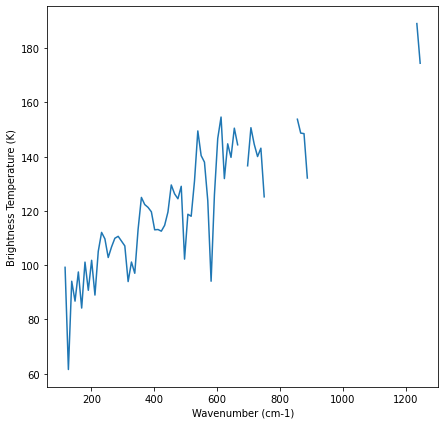

In [28]:
brightness=(1.4387*wave)/np.log(1+(1.191e-12)*(wave**3)/rad)
plt.figure(figsize=(7,7))
plt.plot(wave,brightness)
plt.ylabel('Brightness Temperature (K)')
plt.xlabel('Wavenumber (cm-1)')

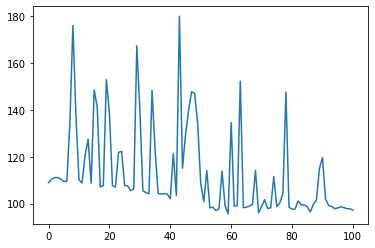

In [29]:
bri_remove=np.where(lat==0)
plt.plot(bri[bri_remove])